In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy.stats import sem
import matplotlib.cm as cm
from configs import engram_dir

# Helper functions

In [2]:
def smooth(xs, ys, n=3):
    vals = np.copy(ys)
    smoothed = np.convolve(ys, np.ones(n)/n, mode='same')
    vals[1:-1] = smoothed[1:-1]
    return vals

def get_df(base, zs, net_yaml):
    data = {
        'valid_score': [], 'valid_steps':[], 'dims': [],
        'episode': [], 'model': [], 'z': [], 'step': [], 'file': []}
    for z in zs:
        task_dir = f'{base}_{net_yaml}_dim{z}'
        task_dir = f'{engram_dir}pickles/{task_dir}/'
        if not os.path.exists(task_dir): continue
        for pickle_file in os.listdir(task_dir):
            if not pickle_file.endswith('.p'): continue
            pickle_file = f'{task_dir}{pickle_file}'
            with open(pickle_file, 'rb') as f:
                results = pickle.load(f)
            valid_score = results['valid_score']
            valid_steps = results['valid_steps_per_ep']
            episode = results['episode']
            model = results['model']
            step = results['step']
            for i in range(len(valid_score)):
                if valid_score[i] == None: continue
                data['valid_score'].append(valid_score[i])
                data['valid_steps'].append(valid_steps[i])
                data['dims'].append(z)
                data['episode'].append(episode[i])
                _model = model[i].split(base+'_')[-1]
                data['model'].append(_model)
                data['z'].append(z)
                data['step'].append(step[i])
                data['file'].append(pickle_file)
    df = pd.DataFrame(data)
    return df

In [3]:
def plot(
    df, plot_key, plot_ep, figsize=(6.4*0.75, 4.8*0.75),
    fnames=None, figname=None, labels=None,
    smooth_plot=True, smooth_plot_n=2, colors=None,
    legend_title=None, ylim=None, plot_title=None, show_legend=True,
    ylabel='Avg Episode Score', xlim=None):
    
    fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)
    zs = np.sort(np.unique(df['z']))
    episode = np.sort(np.unique(df['episode']))
    if fnames is None:
        fnames = np.unique(df['model'])
    for fname_idx, fname in enumerate(fnames):
        line = []
        shading_width = []
        shading_lower = []
        shading_upper = []
        for z in zs:
            df_subset = df[(df['model']==fname) & (df['z']==z)]
            means = []
            sems = []
            val_len = 0
            for ep in episode:
                vals = df_subset[df_subset['episode']==ep]
                vals = vals[plot_key]
                means.append(np.mean(vals))
                sems.append(sem(vals))
                if ep == plot_ep:
                    val_len = len(vals)
            means = np.array(means)
            sems = np.array(sems)
            if z == 5:
                print(fname)
                print(f'Mean: {means[plot_ep]}, SEM: {sems[plot_ep]} for {val_len} vals')
            line.append(means[plot_ep])
            shading_width.append(sems[plot_ep])
        line = np.array(line)
        shading_width = np.array(shading_width)
        if smooth_plot:
            line = smooth(zs, line, smooth_plot_n)
            shading_width = smooth(zs, shading_width, smooth_plot_n)
        shading_lower = line - shading_width
        shading_upper = line + shading_width
        x_axis = zs
        if colors is not None:
            color = colors[fname_idx]
        else:
            color = None
        if labels != None:
            label = fname_labels[fname_idx]
        else:
            label = fname
        ax.plot(x_axis, line, label=label, color=color, alpha=0.8)
        ax.fill_between(x_axis, shading_lower, shading_upper, alpha=0.2,color=color)
    if show_legend: plt.legend(title=legend_title)
    if ylabel != None:
        plt.ylabel(ylabel)
    if ylim != None:
        plt.ylim(ylim[0], ylim[1])
    if xlim != None:
        plt.xlim(xlim[0], xlim[1])
    if plot_title != None:
        plt.title(plot_title)
    plt.xlabel('Latent Size')
    if figname != None:
        plt.savefig(figname + '.png', dpi=300, transparent=True)
    plt.show()

# Task A

In [6]:
zs = np.arange(2, 22)

In [8]:
recalculate = False
if recalculate:
    task_df = get_df('new_gridworld8x8_shuffobs', zs, 'dm_large_q')
    with open('pickles/2c_taskA.p', 'wb') as f:
        pickle.dump(task_df, f)
else:
    with open('pickles/2c_taskA.p', 'rb') as f:
        task_df = pickle.load(f)

In [9]:
np.unique(task_df['model'])

array(['entro-1', 'entro-2', 'entro0', 'entro1', 'entro2',
       'g0.25_-2_entro-1', 'g0.25_-2_entro-2', 'g0.25_-2_entro0',
       'g0.25_-2_entro1', 'g0.25_-3_entro-1', 'g0.25_-3_entro-2',
       'g0.25_-3_entro0', 'g0.25_-3_entro1', 'g0.5_-2_entro-1',
       'g0.5_-2_entro-2', 'g0.5_-2_entro0', 'g0.5_-2_entro1',
       'g0.5_-3_entro-1', 'g0.5_-3_entro-2', 'g0.5_-3_entro0',
       'g0.5_-3_entro1', 'g0.8_-3_entro-1', 'g0.8_-3_entro-2',
       'g0.8_-3_entro0', 'g0.8_-3_entro1', 'g0.8_-4_entro-1',
       'g0.8_-4_entro-2', 'g0.8_-4_entro0', 'g0.8_-4_entro1',
       'g0_-2_entro-1', 'g0_-2_entro-2', 'g0_-2_entro0', 'g0_-2_entro1',
       'mf-1', 'mf0', 'mf1'], dtype=object)

mf
Mean: nan, SEM: nan for 0 vals
entro
Mean: nan, SEM: nan for 0 vals
g0_-2_entro-1
Mean: 1.0, SEM: 0.0 for 45 vals
g0.25_-2_entro0
Mean: 1.0, SEM: 0.0 for 45 vals
g0.5_-2_entro0
Mean: 0.9688888888888889, SEM: 0.023098870107095427 for 45 vals
g0.8_-4_entro0
Mean: 0.9666666666666667, SEM: 0.012712834523274564 for 45 vals


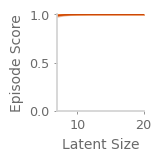

In [33]:
colors = cm.get_cmap('Oranges')
c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
plot(
    task_df, 'valid_score', 600, figsize=(1.5, 1.5),
    fnames=['mf', 'entro', 'g0_-2_entro-1', 'g0.25_-2_entro0', 'g0.5_-2_entro0', 'g0.8_-4_entro0'],
    show_legend=False,
    smooth_plot=True, smooth_plot_n=4,
    colors=['C0', 'C2', colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3])],
    ylim=(0,1), ylabel='Episode Score', xlim=[7,20]
    )

# Task B

In [10]:
zs = np.arange(2, 22)

In [43]:
recalculate = False
if recalculate:
    task_df = get_df('frozentransfer_new_gridworld8x8_shuffobs', zs, 'dm_large_q')
    with open('pickles/2c_frozentransfer.p', 'wb') as f:
        pickle.dump(task_df, f)
else:
    with open('pickles/2c_frozentransfer.p', 'rb') as f:
        task_df = pickle.load(f)

In [44]:
np.unique(task_df['model'])

array(['entro2', 'g0.25_-2_entro0', 'g0.5_-2_entro0', 'g0.8_-4_entro0',
       'g0_-2_entro-1', 'mf0'], dtype=object)

mf
Mean: nan, SEM: nan for 0 vals
entro
Mean: nan, SEM: nan for 0 vals
g0_-2_entro-1
Mean: 0.5766666666666668, SEM: 0.06300580767489838 for 30 vals
g0.25_-2_entro0
Mean: 0.7433333333333333, SEM: 0.05543627040691276 for 30 vals
g0.5_-2_entro0
Mean: 0.7166666666666666, SEM: 0.06731011321485182 for 30 vals
g0.8_-4_entro0
Mean: 0.6533333333333334, SEM: 0.06153838785730926 for 30 vals


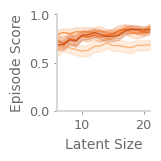

In [45]:
colors = cm.get_cmap('Oranges')
c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
plot(
    task_df, 'valid_score', 100, figsize=(1.5, 1.5),
    fnames=['mf', 'entro', 'g0_-2_entro-1', 'g0.25_-2_entro0', 'g0.5_-2_entro0', 'g0.8_-4_entro0'],
    show_legend=False,
    smooth_plot=True, smooth_plot_n=3,
    colors=['C0', 'C2', colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3])],
    ylim=(0,1), ylabel='Episode Score', xlim=[6,21], figname='2c'
    )

# Test

In [4]:
zs = np.arange(2, 22)

In [5]:
recalculate = True
if recalculate:
    task_df = get_df('frozentransfer_new_gridworld8x8_shuffobs', zs, 'dm_large_q')
#     with open('pickles/2c_frozentransfer.p', 'wb') as f:
#         pickle.dump(task_df, f)
else:
    with open('pickles/2c_frozentransfer.p', 'rb') as f:
        task_df = pickle.load(f)

In [6]:
np.unique(task_df['model'])

array(['entro2', 'g0.25_-2_entro0', 'g0.5_-2_entro0', 'g0.8_-4_entro0',
       'g0_-2_entro-1', 'mf0'], dtype=object)

mf
Mean: nan, SEM: nan for 0 vals
entro
Mean: nan, SEM: nan for 0 vals
g0_-2_entro-1
Mean: 0.5766666666666668, SEM: 0.06300580767489838 for 30 vals
g0.25_-2_entro0
Mean: 0.7433333333333333, SEM: 0.05543627040691276 for 30 vals
g0.5_-2_entro0
Mean: 0.7166666666666666, SEM: 0.06731011321485182 for 30 vals
g0.8_-4_entro0
Mean: 0.6533333333333334, SEM: 0.06153838785730926 for 30 vals


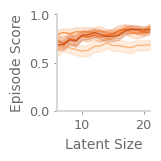

In [45]:
colors = cm.get_cmap('Oranges')
c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
plot(
    task_df, 'valid_score', 100, figsize=(1.5, 1.5),
    fnames=['mf', 'entro', 'g0_-2_entro-1', 'g0.25_-2_entro0', 'g0.5_-2_entro0', 'g0.8_-4_entro0'],
    show_legend=False,
    smooth_plot=True, smooth_plot_n=3,
    colors=['C0', 'C2', colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3])],
    ylim=(0,1), ylabel='Episode Score', xlim=[6,21], figname='2c'
    )

In [ ]:
# Task B

zs = np.arange(2, 22)

recalculate = False
if recalculate:
    task_df = get_df('frozentransfer_new_gridworld8x8_shuffobs', zs, 'dm_large_q')
    with open('pickles/2c_frozentransfer.p', 'wb') as f:
        pickle.dump(task_df, f)
else:
    with open('pickles/2c_frozentransfer.p', 'rb') as f:
        task_df = pickle.load(f)

np.unique(task_df['model'])

colors = cm.get_cmap('Oranges')
c_steps = np.linspace(0.4, 0.8, 4, endpoint=True)
plot(
    task_df, 'valid_score', 100, figsize=(1.5, 1.5),
    fnames=['mf', 'entro', 'g0_-2_entro-1', 'g0.25_-2_entro0', 'g0.5_-2_entro0', 'g0.8_-4_entro0'],
    show_legend=False,
    smooth_plot=True, smooth_plot_n=3,
    colors=['C0', 'C2', colors(c_steps[0]), colors(c_steps[1]), colors(c_steps[2]), colors(c_steps[3])],
    ylim=(0,1), ylabel='Episode Score', xlim=[6,21], figname='2c'
    )